# Assignment 4: Sampling and Model Interpretability
-----------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------------


**Your Name Here:** Abishek Karnan Rajesh

Put your sampling and interpretability skills to the test!

You will build a classification model using a sampling technique of your choice (oversampling, undersampling or SMOTE - I'm not testing how good your model is for this assignment, just that you know how to interpret the model!). We will use CA housing since you have some experience with this from tree-based models. You can use any classification model we have covered in class (DTC, RFC, GBC or logistic regression.)

# Rubric
* (10 points) I've already made your data 'imbalanced' with the 75th percentile. Split the raw data into train and test partition with an 80/20 split. Then use a sampling technique (oversampling, undersampling, SMOTE) on the train data. Important: do not change the class imbalance in the test partition! Count values of each class before and after your sampling to confirm your understanding of how the sampling worked. Your new train data should be more or less balanced, while the test data is still imbalanced. This allows for fair evaluation of the model.

Then, using your fitted model, you will:
* (40 points) Print the top 3 features (using permutation importance with 15 repeats) as a boxplot (like we do in class.)
* (40 points) Create the partial dependence plots for the top 3 features (you may opt to use the `num_grid_points=10` argument if your code is taking a long time to run). Customize the plots so that the Y axis is consistent on each of the three plots and remember that the Y axis is showing the change in predicted probability.
* (10 points) Write five meaningful bullets about what you see in the plots and tables. Does anything surprise you?
  * **Optional:** Potential with issues concerning correlated predictors (read here for a cool way on how to address this: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html)?

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE # Import SMOTE

In [12]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


And we will recode the target variable to a classification problem.

In [13]:
# by using 75th percentile, we will have nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] > np.percentile(df['median_house_value'], q=75), 1, 0)
df['median_house_value'].value_counts()

median_house_value
0    12753
1     4247
Name: count, dtype: int64

In [14]:
# don't forget to split into train/test!

In [15]:
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# Displaying the shapes of X and Y variables
print(X.shape, y.shape)

# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=3118572)

# Displaying the shapes of training and testing sets
print("Shape of X_train :" ,X_train.shape)
print("Shape of X_test :" ,X_test.shape)
print("Shape of y_train :" ,y_train.shape)
print("Shape of y_test :",y_test.shape)

# Displaying the count of categories in the target variable before sampling
print("\nCategory count before sampling")
print(Counter(y_train))

(17000, 8) (17000,)
Shape of X_train : (13600, 8)
Shape of X_test : (3400, 8)
Shape of y_train : (13600,)
Shape of y_test : (3400,)

Category count before sampling
Counter({0: 10167, 1: 3433})


In [16]:
Counter(df['median_house_value'])

Counter({0: 12753, 1: 4247})

Performing Minmax scalling before sampling:

In [17]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sampling

In [18]:
# add your sampling code here
# SMOTE, over, under... choose one!

##Creating a RandomSMOTE instance

In [19]:
# Creating a RandomSMOTE instance
smote = SMOTE(random_state=3118572)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_smote)
print("Value counter after applying SMOTE : ",counter)

Value counter after applying SMOTE :  Counter({1: 10167, 0: 10167})


# Model and Metrics

In [20]:
# use any model you want - fit on train, predict on test!
# you should print confusion matrix and classification report
#  for train and test partitions

In [21]:
# Training the model on the balanced dataset
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train_smote, y_train_smote)

# Making predictions on the training and testing data
train_preds = RFC.predict(X_train_smote)
test_preds = RFC.predict(X_test)

# Displaying the classification report and confusion matrix for the training data
print('Train results: \n')
print(classification_report(y_train_smote, train_preds))
print('Confusion Matrix for Train Data:\n')
print(confusion_matrix(y_train_smote, train_preds))

# Displaying the classification report and confusion matrix for the testing data
print('\nTest results: \n')
print(classification_report(y_test, test_preds))
print('Confusion Matrix for Test Data:\n')
print(confusion_matrix(y_test,test_preds))

Train results: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10167
           1       1.00      1.00      1.00     10167

    accuracy                           1.00     20334
   macro avg       1.00      1.00      1.00     20334
weighted avg       1.00      1.00      1.00     20334

Confusion Matrix for Train Data:

[[10167     0]
 [    0 10167]]

Test results: 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2586
           1       0.78      0.84      0.81       814

    accuracy                           0.91      3400
   macro avg       0.87      0.89      0.88      3400
weighted avg       0.91      0.91      0.91      3400

Confusion Matrix for Test Data:

[[2398  188]
 [ 128  686]]


# Interpretability

## Permutation Importance

In [22]:
# permutation importance is on X_test

## Importing

In [23]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [24]:
#Assign the model to clf
clf = RFC

###Calculate Permutation Importance on the test set

In [25]:
# Step 3: Calculate Permutation Importance on the test set
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=15, random_state=3118572)

### Extract and sort the importances

In [26]:
# Extract and sort the importances
sorted_idx = perm_importance.importances_mean.argsort()

### Get the top 3 features

In [27]:
# Get the top 3 features
top_3_features = sorted_idx[-3:]

### Create a DataFrame for easy plotting

In [28]:
# Create a DataFrame for easy plotting
data = pd.DataFrame(perm_importance.importances[top_3_features].T, columns=np.array(X.columns)[top_3_features])

###Plotting

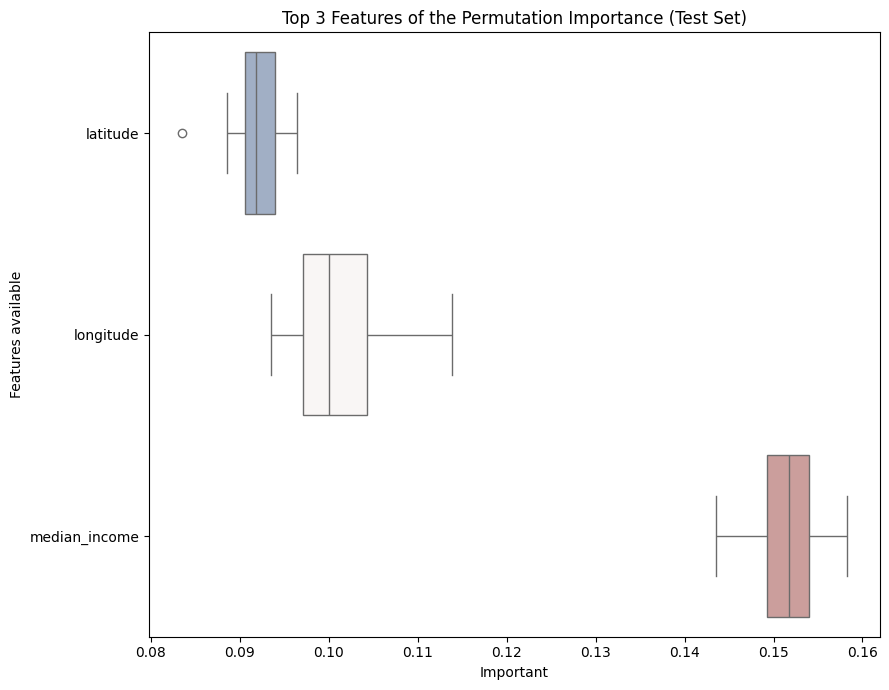

In [29]:
# Step 4: Plotting
plt.figure(figsize=(9, 7))
sns.boxplot(data=data, orient="h", palette="vlag")
plt.title('Top 3 Features of the Permutation Importance (Test Set)')
plt.xlabel('Important')
plt.ylabel('Features available')
plt.tight_layout()
plt.show()

## Partial Dependence

In [30]:
# partial dependence is on X_train

### Data frame Creation

In [31]:
# Dataframe train_X_df is been created with the balanced data
train_X_df = pd.DataFrame(X_train_smote, columns=X.columns)

In [32]:
# First 5 rows of the dataFrame
train_X_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.202202,0.570670,0.784314,0.079267,0.087934,0.029429,0.094256,0.367450
1,0.703704,0.048884,0.686275,0.063899,0.082815,0.030326,0.080763,0.320851
2,0.699700,0.162593,0.764706,0.077343,0.133638,0.056644,0.130108,0.111309
3,0.606607,0.160468,0.235294,0.044840,0.127239,0.051010,0.128759,0.022682
4,0.703704,0.173220,0.294118,0.000738,0.000366,0.001289,0.001349,0.284486


In [33]:
train_X_df['median_income'].nunique()

16082

In [34]:
train_X_df['longitude'].nunique()

7260

In [35]:
train_X_df['latitude'].nunique()

7155

###Using the ICE(Individual Conditional Expectation plot)

In [36]:
# Using the ICE(Individual Conditional Expectation plot)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice,ice_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3624 sha256=3d0a7cff308fd7d8d174e1427f02398fb8ae49c148c5447240be64de7356ec3a
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


## Latitude

In [37]:
tmpdf_latitude= ice(data=train_X_df,  # ICE needs a DataFrame
            column='latitude',        # The column name for which to generate ICE plots
            predict=clf.predict,       # The prediction function from the model
            num_grid_points=100)       # Number of grid points for ICE plots

# Displaying the shape of the resulting DataFrame
print(np.shape(tmpdf_latitude))

(100, 20334)


### Plotting the ICE plot for latitude with additional PDP overlay

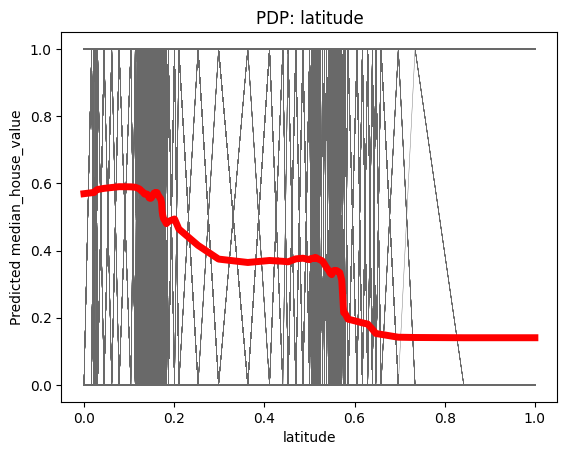

In [38]:
# Plotting the ICE plot for latitude with additional PDP overlay
ice_plot(tmpdf_latitude, c='dimgray', linewidth=0.3,
         plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color': 'red'})

# Adding title and labels to the plot
plt.title('PDP: latitude')
plt.ylabel('Predicted median_house_value')
plt.xlabel('latitude')

# Displaying the plot
plt.show()

## Longitude

In [43]:
tmpdf_longitude = ice(data=train_X_df,  # ICE needs a DataFrame
            column='longitude',        # The column name for which to generate ICE plots
            predict=clf.predict,       # The prediction function from the model
            num_grid_points=100)       # Number of grid points for ICE plots

# Displaying the shape of the resulting DataFrame
print(np.shape(tmpdf_longitude))

(100, 20334)


### Plotting the ICE plot for longitude with additional PDP overlay

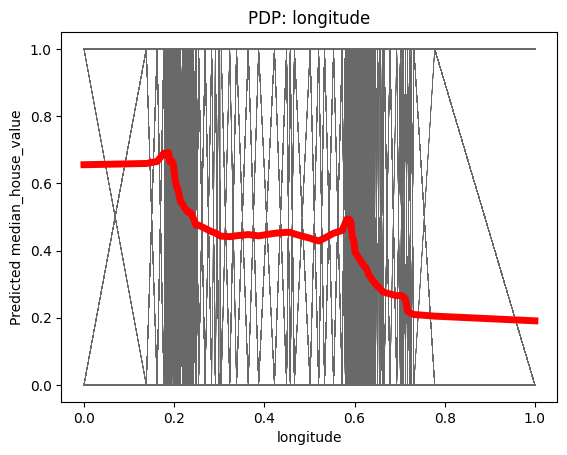

In [40]:
# Plotting the ICE plot for longitude with additional PDP overlay
ice_plot(tmpdf_longitude, c='dimgray', linewidth=0.3,
         plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color': 'red'})

# Adding title and labels to the plot
plt.title('PDP: longitude')
plt.ylabel('Predicted median_house_value')
plt.xlabel('longitude')

# Displaying the plot
plt.show()

## median_income

In [41]:
tmpdf_median_income = ice(data=train_X_df,  # ICE needs a DataFrame
            column='median_income',        # The column name for which to generate ICE plots
            predict=clf.predict,       # The prediction function from the model
            num_grid_points=100)       # Number of grid points for ICE plots

# Displaying the shape of the resulting DataFrame
print(np.shape(tmpdf_median_income))

(100, 20334)


### Plotting the ICE plot for median_income with additional PDP overlay

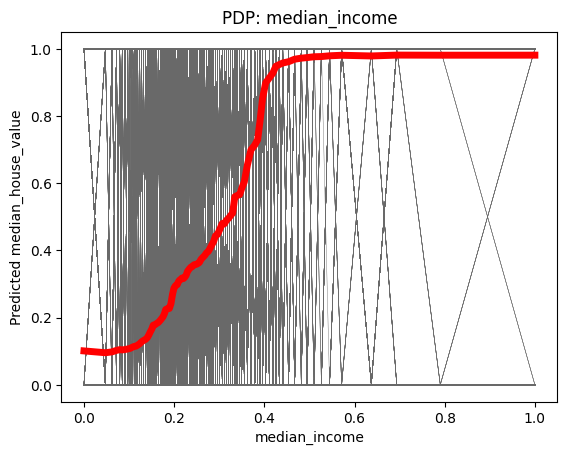

In [42]:
# Plotting the ICE plot for median_income with additional PDP overlay
ice_plot(tmpdf_median_income, c='dimgray', linewidth=0.3,
         plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color': 'red'})

# Adding title and labels to the plot
plt.title('PDP: median_income')
plt.ylabel('Predicted median_house_value')
plt.xlabel('median_income')

# Displaying the plot
plt.show()

# Conclusions

###Balanced Sampling Output:



The sampling output after applying SMOTE reveals a well-balanced distribution of classes, with 10,167 instances for both class 0 and class 1. This balanced distribution indicates successful mitigation of class imbalance, which is crucial for improving model performance, particularly in scenarios with skewed class distributions.

###Exceptional Training Set Performance:



Model metrics on the training set demonstrate exceptional performance, with perfect precision, recall, and F1-score for both classes (0 and 1). The accuracy of 1.00 indicates that the model achieved perfect predictions on the training data, suggesting a potential risk of overfitting.

###Discrepancies in Test Set Performance:



While the model maintains relatively high precision on the test set, there are notable discrepancies in recall, especially for class 1. The lower recall for class 1 (0.84) compared to class 0 (0.93) suggests that the model struggles more in correctly identifying instances of class 1, which could be indicative of class imbalance issues or overfitting.

###Spatial and Socioeconomic Factors in Features:



The top 3 features identified (latitude,longitude and median_income,) suggest the importance of spatial and socioeconomic factors in predicting median_house_income. These features likely capture regional disparities, with longitude and latitude representing geographic location and median_income reflecting the socioeconomic status of the area.


###Insights from Box Plots and PDP Plots:



Peaks in the PDP plot can indicate regions where median_house_income is significantly higher or lower, suggesting areas with higher or lower purchasing power or economic development.

Fluctuations or plateaus in the plot may reveal income thresholds where housing affordability becomes a significant factor, influencing median_house_income dynamics.

Changes in slope or curvature in the plot could indicate transitions between different climatic zones or economic regions, influencing housing market dynamics accordingly.